# Introduction

The goal of this report is to analyze four heuristics for the Game Playing project:
- __stay_close_to_center__: the agent moves near the center of the board.
- __stay_close_to_opponent__: the agent follows the opponent across the board.
    - _aggressive variant_: the agent also tries to deny the legal moves of the opponent.
- __stay_close_to_blank_spaces__: the agent goes to the area with the most blank spaces.
- __improved_opponent__: the agent takes the mean of the stay_close_to_opponent (aggressive) and improve_score heuristics.

The idea behind __stay_close_to_center__ and __stay_close_to_blank_spaces__ heuristics is to keep the agent where there is less constraints. Similar to the improved_score, we except the agent to find more options in these areas than its opponent.

The plan for the __stay_close_to_opponent__ heuristic is to copy the opponent action and steal its legal moves. We except the agent to win though a war of attrition.

Finally, the __improved_opponent__ heuristic is a combination of two score functions: improved_score and stay_close_to_opponent (aggresive). The agent will balance its tendency to move where there is more options and stop the track of its opponent. 

In the next paragraph, we import the tournament data and visualize the results.

# Data Preparation

In [28]:
from collections import defaultdict
from glob import iglob
import pandas as pd
import numpy as np
import os
import re

%matplotlib inline

In [29]:
PATTERN = re.compile('^Match (\d+):\s+([\w_]+)\s+vs\s+([\w_]+)\s+Result:\s+(\d+)\s+to\s+(\d+)$')

def extract_matches_from_result(result):
    """Extract match information and index the win ratio by opponent and players."""
    matches = defaultdict(dict)
    
    with open(result, 'r') as fin:
        for l in map(lambda l: l.strip(), fin.readlines()):
            m = PATTERN.search(l)
            
            if m is None:
                continue
                
            mid, player, opponent, wins, losses = m.groups()
            wins, losses = int(wins), int(losses)
            wins_ratio = wins / (wins + losses)
            
            matches[player][opponent] = wins_ratio 

    return matches

# hierarchical index
index0 = list()
index1 = list()

# table values
values = list()

for result in iglob('../results/*'):
    basename = os.path.basename(result)
    filename, ext = os.path.splitext(basename)
    matches = extract_matches_from_result(result)
    
    index0.extend([filename] * len(matches.keys()))
    index1.extend(matches.keys())
    values.extend(matches.values())
    
df = pd.DataFrame(values, index=[index0, index1])
df['AVG'] = df.mean(axis=1)
df

AB_Improved  AB_Null  AB_Open  \
improved_opponent                Student             0.60     0.75     0.75   
                                 ID_Improved         0.65     0.80     0.55   
stay_close_to_opponent_aggresive Student             0.50     0.80     0.60   
                                 ID_Improved         0.75     0.70     0.60   
stay_close_to_center             Student             0.60     0.70     0.70   
                                 ID_Improved         0.50     0.70     0.65   
stay_close_to_opponent           Student             0.55     0.80     0.40   
                                 ID_Improved         0.55     0.75     0.60   
stay_close_to_blank_spaces       Student             0.50     0.60     0.60   
                                 ID_Improved         0.65     0.70     0.60   

                                              MM_Improved  MM_Null  MM_Open  \
improved_opponent                Student             0.35     0.85     0.70   
                                 ID_Improved         0.60     0.60     0.55   
stay_close_to_opponent_aggresive Student             0.60     0.90     0.70   
                                 ID_Improved         0.75     0.75     0.70   
stay_close_to_center             Student             0.70     0.65     0.50   
                                 ID_Improved         0.55     0.85     0.65   
stay_close_to_opponent           Student             0.65     0.95     0.70   
                                 ID_Improved         0.80     0.80     0.75   
stay_close_to_blank_spaces       Student             0.35     0.90     0.60   
                                 ID_Improved         0.70     0.80     0.80   

                                              Random       AVG  
improved_opponent                Student        1.00  0.714286  
                                 ID_Improved    0.95  0.671429  
stay_close_to_opponent_aggresive Student        0.95  0.721429  
                                 ID_Improved    0.85  0.728571  
stay_close_to_center             Student        0.80  0.664286  
                                 ID_Improved    0.85  0.678571  
stay_close_to_opponent           Student        0.90  0.707143  
                                 ID_Improved    0.95  0.742857  
stay_close_to_blank_spaces       Student        0.90  0.635714  
                                 ID_Improved    0.95  0.742857

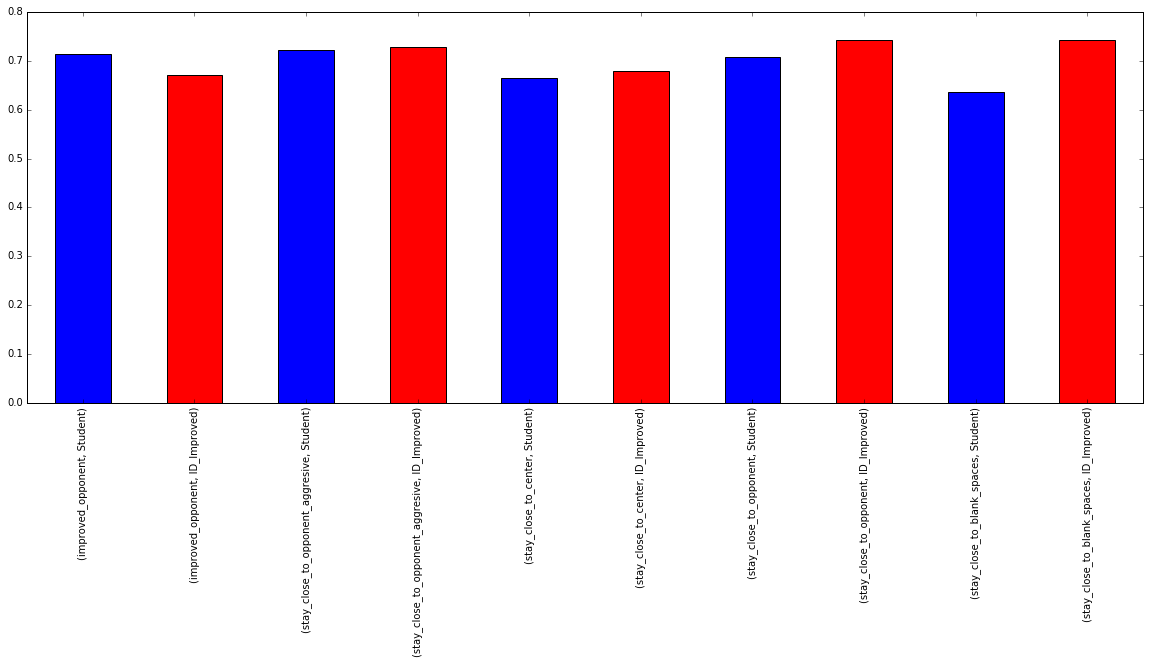

In [31]:
df['AVG'].plot(kind='bar', color=['b', 'r'], figsize=(20, 7))

# Conclusions

3 heuristics are performing worse than the project baseline (ID_improved): __stay_close_to_blank_spaces__, __stay_close_to_opponent__, __stay_close_to_center__. Despite the initial intuition, the heuristic seems to be too simple compared to the baseline. For instance, these 3 heuristics do not consider the location of the opponent in their evaluation. __They should not be selected for the custom score function__.

At first, the aggressive variant of the __stay_close_to_opponent__ seems to have similar performance than the baseline heuristic. However, the main wins are earned against the random and null opponents, which is not the most difficult configuration. __This variant is not satisfying on its own and should not be selected as well__.

Combined with the __improved_score__ function, we see that the heuristic outperforms the baseline. A key takeaway of this projet is that a good heuristic need to combine different aspect of the game. For instance, it should select the move that lefts the agent with the most options while denying the opponent tactic. __The combined function could be used as the main custom_score function for our agent__.

Three reasons to choose the proposed function (__improve_score__):

  - the overall winning rate of the proposed function (71%) is higher than the baseline function (67%)
  
  - the proposed function has a similar winning rate against the stronger opponent (AB_Improved) (60% compared to 65%)
  
  - the proposed function is able to perform better than the baseline function against weaker opponents (RANDOM +5%, MM_Open +15%, MM_Null +15%, AB_Open +20%)